In [14]:
import pandas as pd   #pandas es una librería de procesamiento de datos
url = "https://raw.githubusercontent.com/Roberto-M-M/carne/main/meat-consumption-vs-gdp-per-capita.csv"
datos_csv_url = pd.read_csv(url, encoding='utf-8-sig')
datos_csv_url

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita","GDP per capita, PPP (constant 2017 international $)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1961,14.719367,NaN,NaN
2,Afghanistan,AFG,1962,14.738824,NaN,NaN
3,Afghanistan,AFG,1963,15.176605,NaN,NaN
4,Afghanistan,AFG,1964,15.378455,NaN,NaN
...,...,...,...,...,...,...
13655,Zimbabwe,ZWE,2017,51.559998,2331.7808,NaN
13656,Zimbabwe,ZWE,2018,50.109962,2399.6216,NaN
13657,Zimbabwe,ZWE,2019,50.280014,2203.3967,NaN
13658,Zimbabwe,ZWE,2020,52.010020,1990.3195,NaN


Eliminamos continentes porque no los da datos improtantes

In [21]:
datos_sin_Continent = datos_csv_url.drop(columns=['Continent'])
datos_sin_Continent

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita","GDP per capita, PPP (constant 2017 international $)"
0,Abkhazia,OWID_ABK,2015,NaN,NaN
1,Afghanistan,AFG,1961,14.719367,NaN
2,Afghanistan,AFG,1962,14.738824,NaN
3,Afghanistan,AFG,1963,15.176605,NaN
4,Afghanistan,AFG,1964,15.378455,NaN
...,...,...,...,...,...
13655,Zimbabwe,ZWE,2017,51.559998,2331.7808
13656,Zimbabwe,ZWE,2018,50.109962,2399.6216
13657,Zimbabwe,ZWE,2019,50.280014,2203.3967
13658,Zimbabwe,ZWE,2020,52.010020,1990.3195


In [22]:
#1. Algo de exploración de los datos
datos_sin_Continent.dtypes  #podemos ver todas las columnas y el tipo de dato que contiene
#como se puede observar, el ID es el único identificador de los jugadores, no habrá repetidos.
#len(datos_csv_url)

Entity                                                                                                 object
Code                                                                                                   object
Year                                                                                                    int64
Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita    float64
GDP per capita, PPP (constant 2017 international $)                                                   float64
dtype: object

In [23]:
#para analizar los datos categóricos podemos utilizar la función groupby:
datos_sin_Continent.groupby(by =['Entity', 'Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita']).size()

Entity       Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita
Afghanistan  8.370001                                                                                              1
             8.740000                                                                                              1
             8.799998                                                                                              1
             9.229999                                                                                              1
             9.520001                                                                                              1
                                                                                                                  ..
Zimbabwe     55.969982                                                                                             1
             62.689976                                               

In [24]:
datos_sin_Continent.isna().sum() #como se puede observar, tenemos datos faltantes.

Entity                                                                                                   0
Code                                                                                                  2875
Year                                                                                                     0
Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita    1068
GDP per capita, PPP (constant 2017 international $)                                                   7314
dtype: int64

In [26]:
#Podemos remplazarlos por (cero,media/max/mediana por columna, y fila) o simplemente eliminarlas 
#para evitar sesgos. Si son pocos los datos nan o no tienen importancia, se puede eliminarlos sin problemas
#si eliminamos por columnas, pierdo mucha información, pero si eliminamos por filas, pierdo todo, por eso debo agrupar
#qué necesito y ya luego elimino. Si voy a agrupar varias cosas tengo que utilizar doble corchete.
datos_csv_url_clean = datos_sin_Continent[['Entity','Code','Year','Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita','GDP per capita, PPP (constant 2017 international $)',
                                     ]].dropna(axis = 0, how = 'any')  #drop rows with any missing values in them
print(datos_csv_url_clean.isna().sum())
print(len(datos_csv_url_clean))
datos_csv_url_clean

Entity                                                                                                0
Code                                                                                                  0
Year                                                                                                  0
Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita    0
GDP per capita, PPP (constant 2017 international $)                                                   0
dtype: int64
5201


,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita","GDP per capita, PPP (constant 2017 international $)"
42,Afghanistan,AFG,2002,14.495209,1280.4631
43,Afghanistan,AFG,2003,13.168231,1292.3335
44,Afghanistan,AFG,2004,13.960530,1260.0605
45,Afghanistan,AFG,2005,14.268150,1352.3207
46,Afghanistan,AFG,2006,11.292855,1366.9932
...,...,...,...,...,...
13655,Zimbabwe,ZWE,2017,51.559998,2331.7808
13656,Zimbabwe,ZWE,2018,50.109962,2399.6216
13657,Zimbabwe,ZWE,2019,50.280014,2203.3967
13658,Zimbabwe,ZWE,2020,52.010020,1990.3195


In [27]:
#Primero podemos inspeccionar si hay valores únicos con el siguiente comando:

datos_csv_url_clean.nunique()


Entity                                                                                                 179
Code                                                                                                   179
Year                                                                                                    32
Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita    5185
GDP per capita, PPP (constant 2017 international $)                                                   5201
dtype: int64

In [28]:
#Procedemos a inspeccionar primero cuáles podrían ser esos datos repetidos.
datos_csv_url_clean[datos_csv_url_clean.duplicated(subset = ['Entity','Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita'],keep=False)].sort_values('Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita') #keep=false para que muestre todos los repetidos

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita","GDP per capita, PPP (constant 2017 international $)"
9854,Philippines,PHL,2016,37.84,7616.0500
9855,Philippines,PHL,2017,37.84,8001.7563


In [31]:
pais_buscado = "Chile"  # Por ejemplo, aquí buscamos "United States"

# Filtrar el conjunto de datos para el país buscado
datos_pais_buscado = datos_csv_url_clean[datos_csv_url_clean['Entity'] == pais_buscado]

# Mostrar los datos del país buscado
datos_pais_buscado

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita","GDP per capita, PPP (constant 2017 international $)"
2428,Chile,CHL,1990,37.652775,9701.824
2429,Chile,CHL,1991,37.881737,10290.040
2430,Chile,CHL,1992,42.523273,11256.210
2431,Chile,CHL,1993,47.821630,11812.649
2432,Chile,CHL,1994,52.908844,12221.508
2433,Chile,CHL,1995,56.460716,13122.946
2434,Chile,CHL,1996,59.037277,13825.156
2435,Chile,CHL,1997,61.208100,14652.775
2436,Chile,CHL,1998,62.783480,15074.580
2437,Chile,CHL,1999,62.466557,14855.357


In [34]:
#Primero debemos cambiar el tipo de dato a un tipo categórico para que la función logre entender la transformación
datos_csv_url_clean['Entity'] = datos_csv_url_clean['Entity'].astype('category')
datos_csv_url_clean.dtypes

Entity                                                                                                category
Code                                                                                                    object
Year                                                                                                     int64
Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita     float64
GDP per capita, PPP (constant 2017 international $)                                                    float64
dtype: object

In [35]:
#Para escribir datos o guardar nuestro dataframe transformado basta con usar: 
# df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')
datos_csv_url_clean.to_csv('Datos_procesados_soccer.csv', encoding='utf-8-sig') 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [40]:
df = datos_csv_url_clean
print(df.shape)
df.head()

(5201, 5)


,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita","GDP per capita, PPP (constant 2017 international $)"
42,Afghanistan,AFG,2002,14.495209,1280.4631
43,Afghanistan,AFG,2003,13.168231,1292.3335
44,Afghanistan,AFG,2004,13.960530,1260.0605
45,Afghanistan,AFG,2005,14.268150,1352.3207
46,Afghanistan,AFG,2006,11.292855,1366.9932


Text(0.5, 1.0, 'Nube de puntos para Chile')

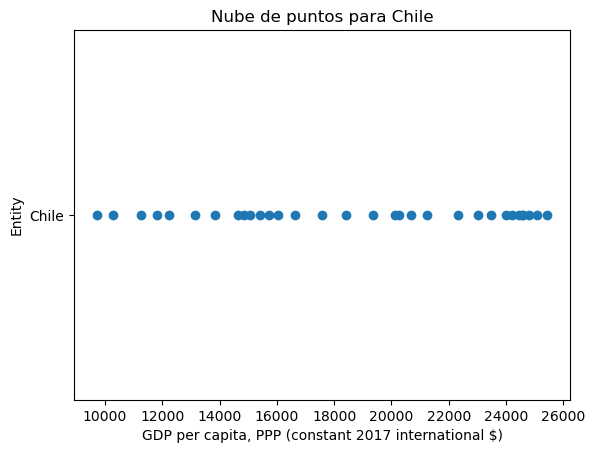

In [42]:
chile_df = df[df['Entity'] == 'Chile']
# Crear la gráfica de dispersión
plt.scatter(chile_df['GDP per capita, PPP (constant 2017 international $)'], chile_df['Entity'])
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Entity')
plt.title('Nube de puntos para Chile')

In [50]:
chile_df = df[df['Entity'] == 'Chile']

# Obtener los valores de V1 (GDP per capita) y V2 (Entity)
V1 = chile_df['GDP per capita, PPP (constant 2017 international $)'].values.reshape(-1, 1)
V2 = chile_df['Entity'].values.reshape(-1, 1)

# Mostrar las formas de los arrays resultantes
print("Forma de V1:", V1.shape)
print("Forma de V2:", V2.shape)

Forma de V1: (32, 1)
Forma de V2: (32, 1)


In [51]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(V1, V2, test_size=0.8)
#si queremos podemos ver el tamaño de los datos
len(X_train), len(X_test), len(y_train), len(y_test)
#X_test.shape #como los datos que recibimos no son tipo vector o arreglo, en el modelo debemos agregar corchetes adicionales

(6, 26, 6, 26)

In [52]:
#podemos ver la forma o tipo de datos obtenidos
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)
#como se puede ver, el resultado de la división son vectores de 1 dimensión, y esto será un problema para la función
#de entrenamiento ya que ella necesita vectores fila o vectores columna. Por tanto, necesitamos hacer la transformación

(6, 1)
(26, 1)
(6, 1)
(26, 1)


(None, None, None, None)

In [53]:
X_train.shape#, X_train.shape, y_train.shape, y_test.shape
#ojo ejecutar solo una vez, ya que cada vez que se ejecuta, le agrega una nueva dimensión

(6, 1)

In [54]:
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)

(6, 1)
(26, 1)
(6, 1)
(26, 1)


(None, None, None, None)

In [55]:
modelo = linear_model.LinearRegression()
modelo

LinearRegression()

In [60]:
 modelo.fit(X_train, y_train)

ValueError: could not convert string to float: 'Chile'